In [18]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [19]:
#Load Data
data = pd.read_csv('Admission_Predict.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [20]:
import numpy as np

data
data['Admitted'] = np.where(data['Chance of Admit ']>= 0.9, 1, 0) #create a new column name admitted where we select the studendt who has change > 90% of the admittion
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Admitted
0,1,337,118,4,4.5,4.5,9.65,1,0.92,1
1,2,324,107,4,4.0,4.5,8.87,1,0.76,0
2,3,316,104,3,3.0,3.5,8.00,1,0.72,0
3,4,322,110,3,3.5,2.5,8.67,1,0.80,0
4,5,314,103,2,2.0,3.0,8.21,0,0.65,0


In [6]:
#Check The column names
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit ', 'Admitted'],
      dtype='object')

In [11]:
#Select the appropriate Features
feature_cols = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ',
       'CGPA', 'Research']
X = data[feature_cols] # Features
y = data.Admitted # Target variable

In [12]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

Building Decision Tree Model


In [28]:

 #Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

Evaluating the model

In [14]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9583333333333334


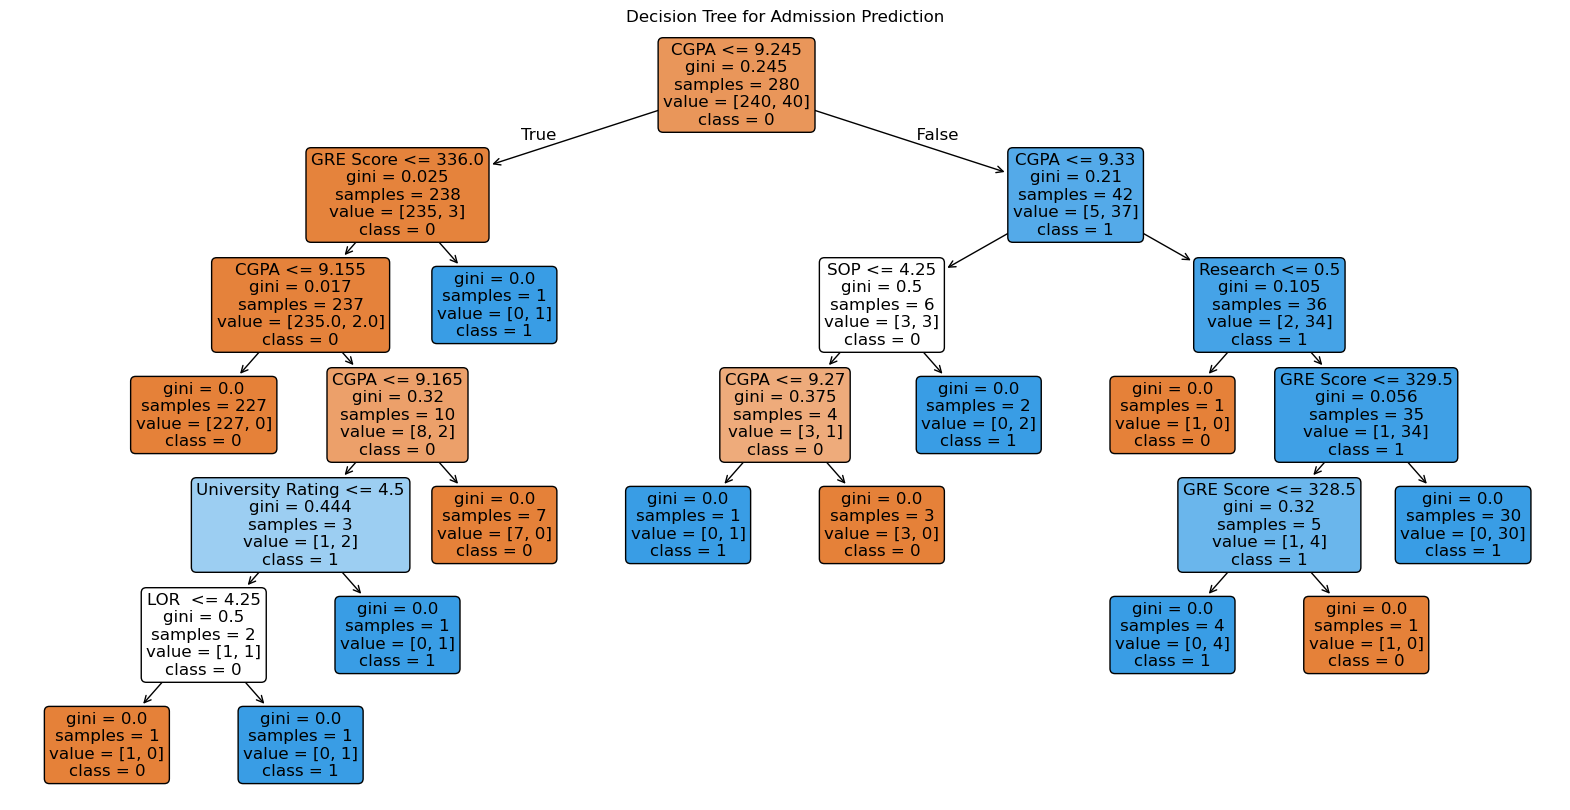

In [31]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(clf, 
          filled=True, 
          rounded=True,
          feature_names=feature_cols, 
          class_names=['0', '1'],
          fontsize=12)
plt.title("Decision Tree for Admission Prediction")
plt.show()

Optimizing Decision Tree Performance

In [22]:
#Optimizing
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.975


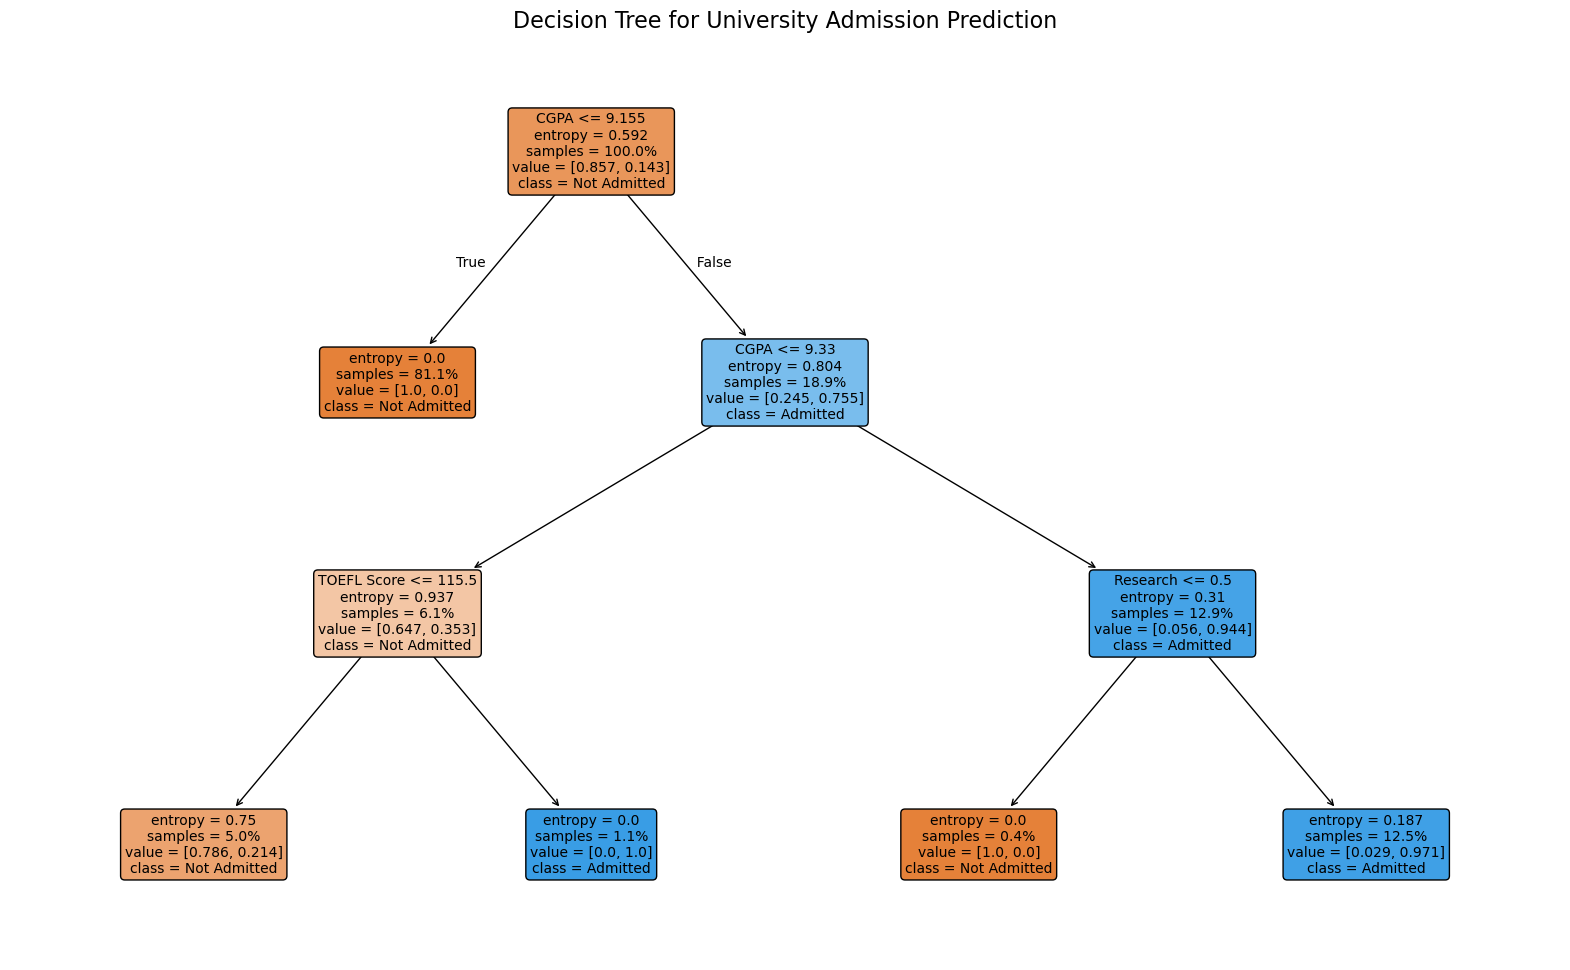

In [25]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 12))
plot_tree(clf, 
          filled=True, 
          rounded=True,
          feature_names=feature_cols, 
          class_names=['Not Admitted', 'Admitted'],  # More descriptive names
          fontsize=10,
          proportion=True)
plt.title("Decision Tree for University Admission Prediction", fontsize=16)
plt.show()

[Text(0.375, 0.875, 'x[5] <= 9.155\nentropy = 0.592\nsamples = 280\nvalue = [240, 40]'),
 Text(0.25, 0.625, 'entropy = 0.0\nsamples = 227\nvalue = [227, 0]'),
 Text(0.3125, 0.75, 'True  '),
 Text(0.5, 0.625, 'x[5] <= 9.33\nentropy = 0.804\nsamples = 53\nvalue = [13, 40]'),
 Text(0.4375, 0.75, '  False'),
 Text(0.25, 0.375, 'x[1] <= 115.5\nentropy = 0.937\nsamples = 17\nvalue = [11, 6]'),
 Text(0.125, 0.125, 'entropy = 0.75\nsamples = 14\nvalue = [11, 3]'),
 Text(0.375, 0.125, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.75, 0.375, 'x[6] <= 0.5\nentropy = 0.31\nsamples = 36\nvalue = [2, 34]'),
 Text(0.625, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.875, 0.125, 'entropy = 0.187\nsamples = 35\nvalue = [1, 34]')]

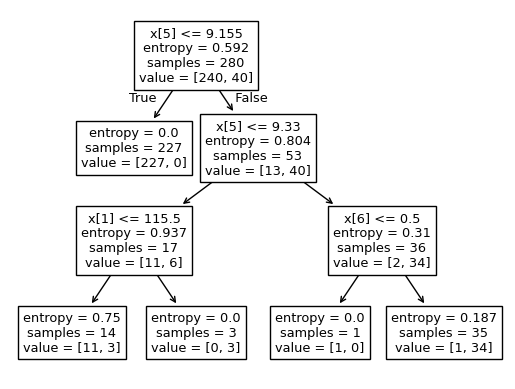

In [27]:
 from sklearn import tree
 tree.plot_tree(clf)